In [1]:
import torch
from src import Pipeline, Plotter
from src.utils.utils_experiment import load_data
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = 'spleen'
X, ids = load_data(dataset)
pipe = Pipeline(X, config=f"configs/{dataset}.ini", verbose=True, col_ids=ids)
pipe.run()

PCA: Knee found at 12 components. Using n=12.
KMedoids: Finished clustering for k=2. Score=0.34.
KMedoids: Finished clustering for k=4. Score=0.25.
KMedoids: Best score achieved for k=2 at 0.34.
TTest: Finished finding markers for cluster 0.
TTest: Finished finding markers for cluster 1.
HyperGeom: Finished finding lvl1 types.
HyperGeom: Finished finding lvl2 types.


In [3]:
plotter = Plotter(pipe)

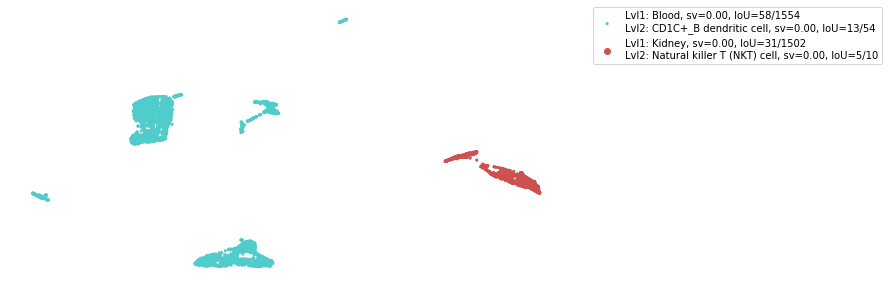

In [4]:
plotter.plot_clu()